# Analyse en Composantes Principales

In [1]:
# chargement des données
import pandas as pd

donnee = pd.read_excel('temperature.xlsx',sheet_name=0,header=0,index_col=0)

#### Statistiques descriptives

In [2]:
# Statistiques sur les variables
display(donnee.describe(include = "all").round(2))

,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,3.97,4.83,8.23,10.98,14.43,17.83,19.83,19.57,16.99,12.32,7.93,4.85
std,2.01,1.87,1.53,1.41,1.50,1.79,2.13,2.01,1.85,1.83,1.80,1.96
min,0.40,1.50,5.60,8.90,11.60,14.40,15.60,16.00,14.70,9.50,4.90,1.30
25%,2.40,3.35,7.55,10.00,13.70,17.15,18.90,18.45,15.85,11.30,6.60,3.45
50%,4.70,5.30,7.80,10.70,14.30,17.50,19.40,19.10,16.40,11.60,7.80,5.40
75%,5.55,6.20,9.55,12.20,15.35,19.00,20.90,20.95,18.45,13.55,9.05,6.35
max,7.50,8.50,10.80,13.30,16.80,20.80,23.30,22.80,20.30,16.00,11.50,8.20


In [3]:
# Dimension des données actives
n = donnee.shape[0]  # nombre de lignes
p = donnee.shape[1]  # nombre de colonnes
print(f'n = {n} et p = {p}')

n = 15 et p = 12


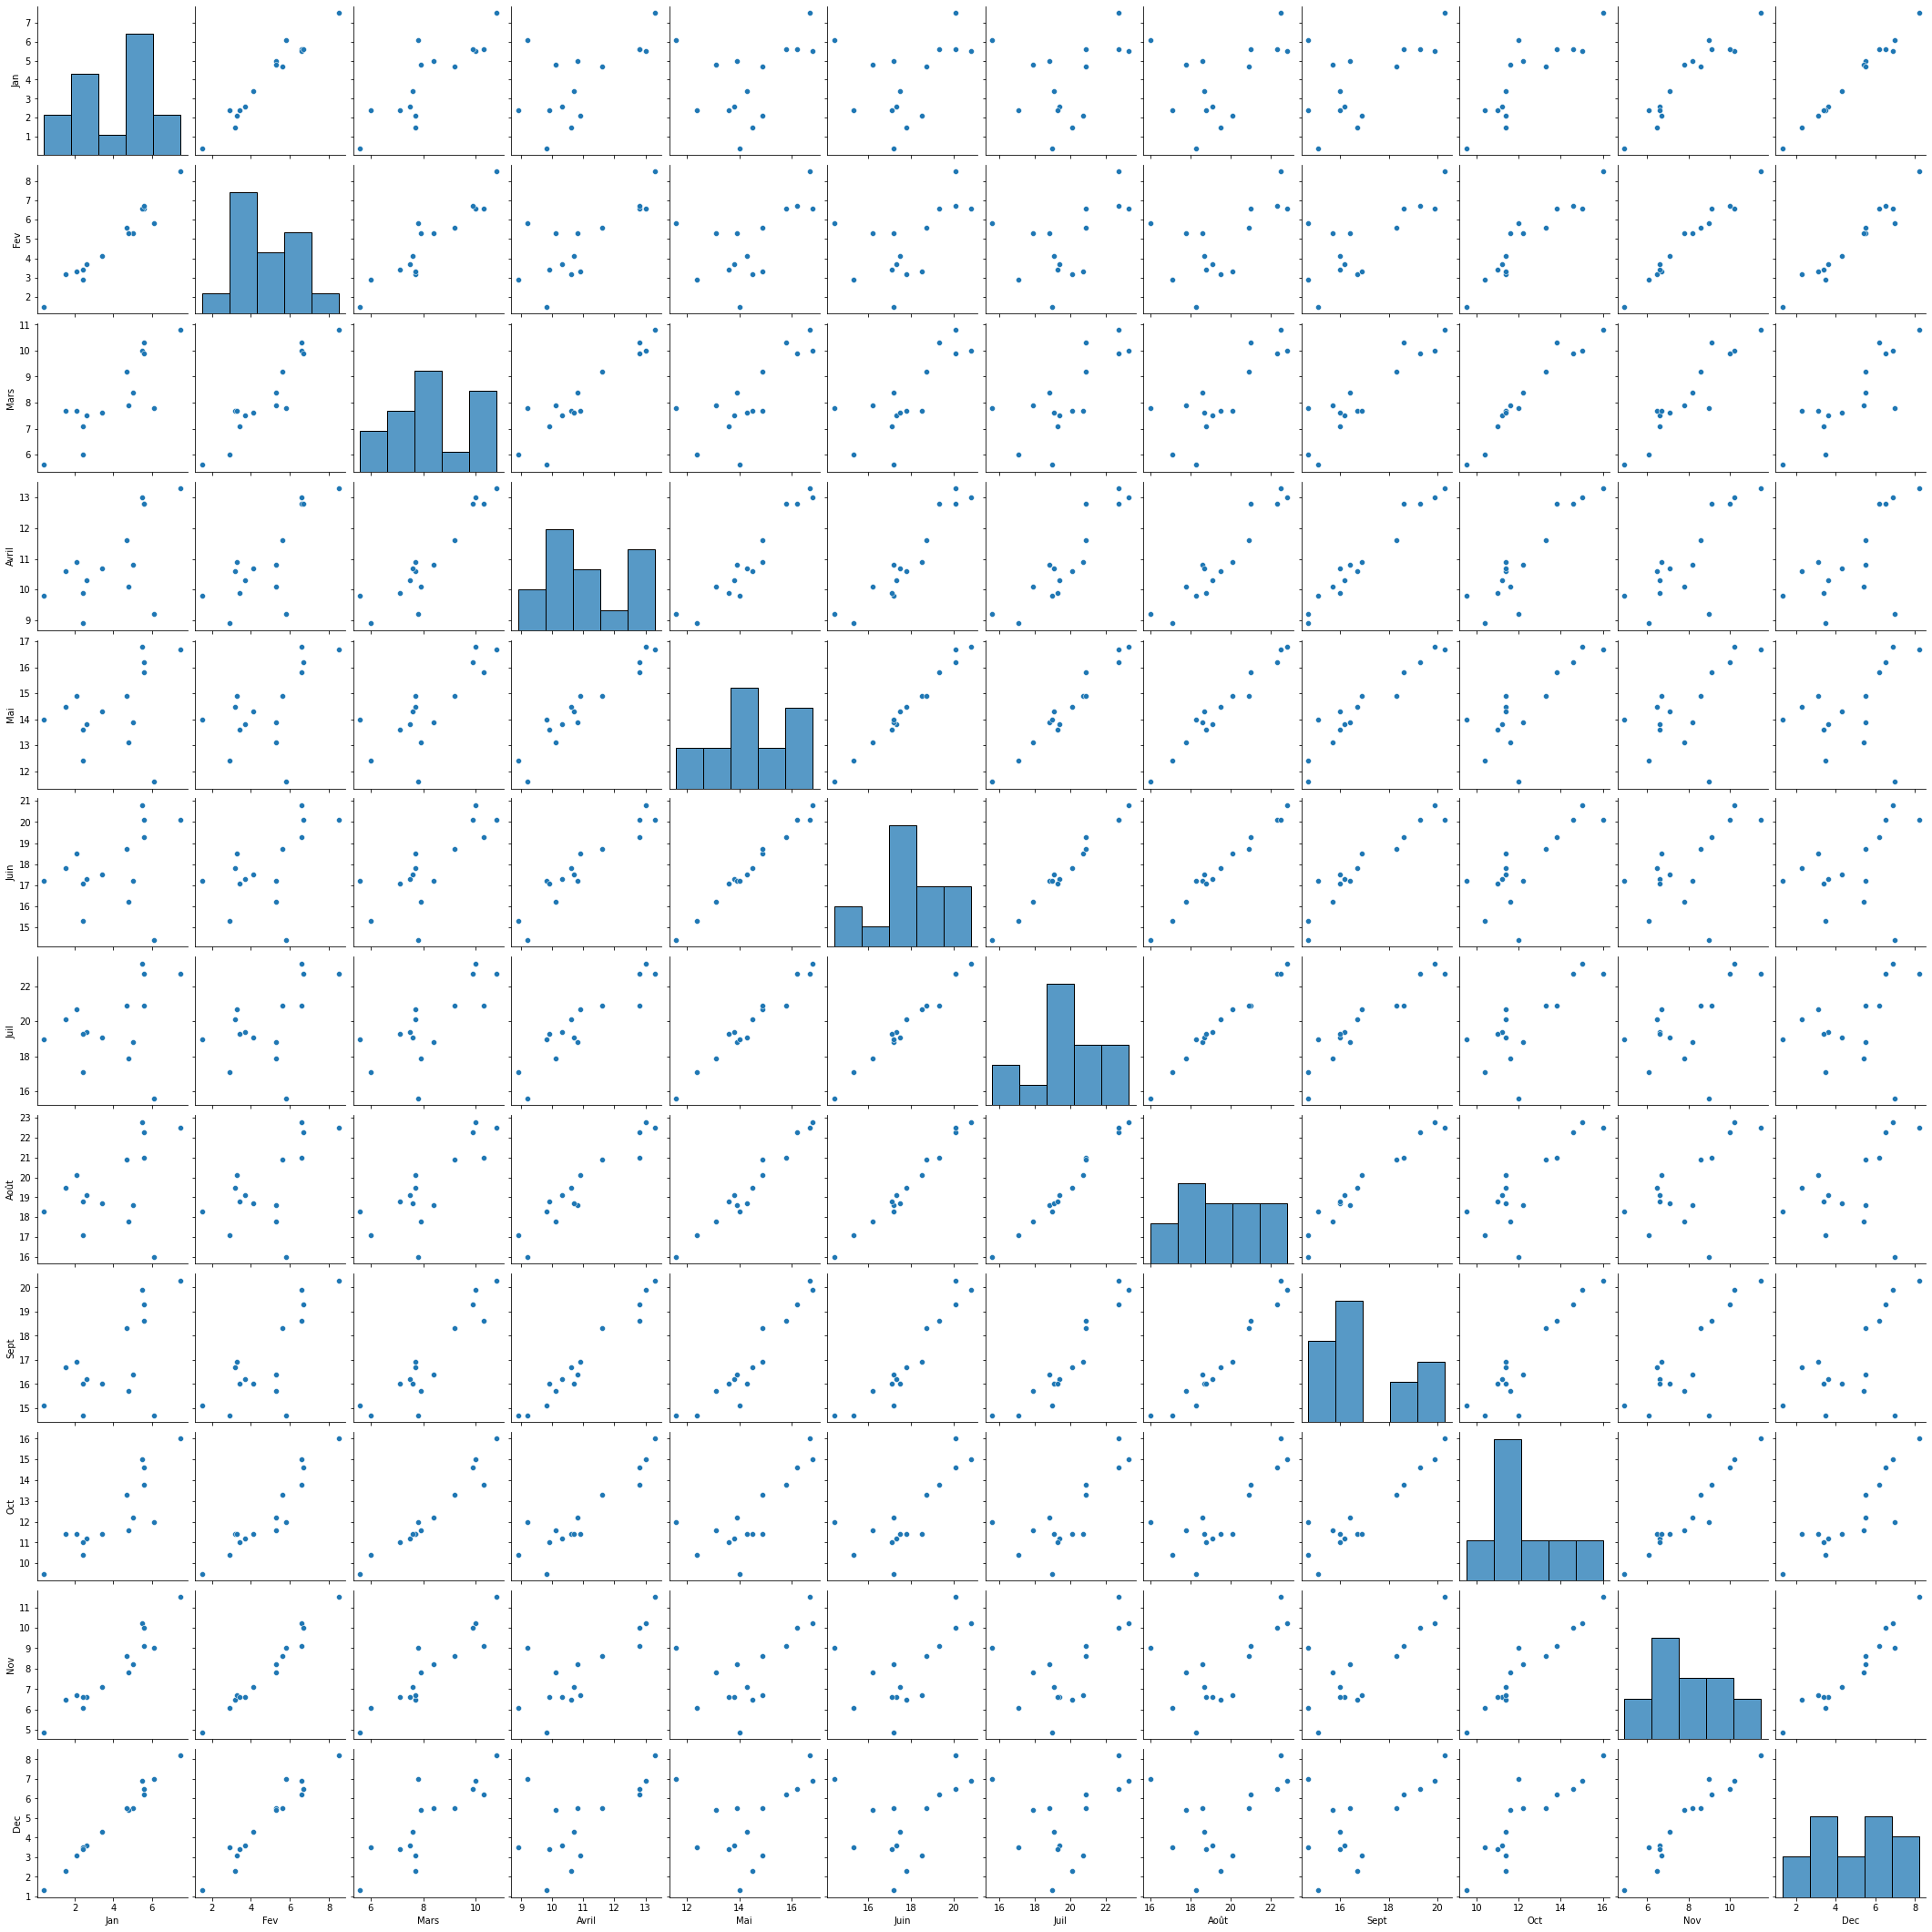

In [4]:
# pairplot
import seaborn as sns

sns.pairplot(donnee,aspect=1)

#### Notion de distance entre individus

$$\text{d}^2(i,l) = \displaystyle \sum_{k=1}^{K}(x_{ik}-x_{lk})^2$$

In [5]:
# Distance entre villes
import numpy as np

def distance(x,y):
    return np.sum((x-y)**2)

#   Calcul de la distance
rowdist = pd.DataFrame(np.zeros(shape=(n,n),dtype=float),index = donnee.index,
                       columns = donnee.index)

for i in range(n):
    for j in range(i+1,n):
        rowdist.values[i,j] = distance(donnee.values[i,:],donnee.values[j,:])

# Affichage
display(rowdist.round(1))

Villes,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
Villes,,,,,,,,,,,,,,,
Bordeaux,0.0,133.9,70.9,78.1,157.9,59.8,17.2,7.9,36.6,32.1,56.9,67.1,175.1,6.7,84.9
Brest,0.0,0.0,75.5,115.1,53.6,121.4,231.3,191.4,40.3,241.3,61.9,21.9,142.3,108.3,74.7
Clermont,0.0,0.0,0.0,5.0,23.3,6.9,132.5,105.9,17.2,190.7,2.3,18.3,26.7,37.7,0.8
Grenoble,0.0,0.0,0.0,0.0,38.7,2.5,132.1,108.4,34.3,200.8,11.1,40.2,22.1,43.6,6.0
Lille,0.0,0.0,0.0,0.0,0.0,51.9,253.2,214.0,47.4,315.8,27.6,27.9,25.4,108.4,17.2
Lyon,0.0,0.0,0.0,0.0,0.0,0.0,103.7,83.8,30.4,168.9,10.7,41.6,33.7,30.4,9.8
Marseille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,94.6,13.8,117.8,141.2,253.9,31.6,150.2
Montpellier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.6,16.3,92.0,110.0,221.2,18.5,122.0
Nantes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,8.4,4.9,82.1,19.4,21.8


In [6]:
# Affichage
display(rowdist.round(1))

Villes,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
Villes,,,,,,,,,,,,,,,
Bordeaux,0.0,133.9,70.9,78.1,157.9,59.8,17.2,7.9,36.6,32.1,56.9,67.1,175.1,6.7,84.9
Brest,0.0,0.0,75.5,115.1,53.6,121.4,231.3,191.4,40.3,241.3,61.9,21.9,142.3,108.3,74.7
Clermont,0.0,0.0,0.0,5.0,23.3,6.9,132.5,105.9,17.2,190.7,2.3,18.3,26.7,37.7,0.8
Grenoble,0.0,0.0,0.0,0.0,38.7,2.5,132.1,108.4,34.3,200.8,11.1,40.2,22.1,43.6,6.0
Lille,0.0,0.0,0.0,0.0,0.0,51.9,253.2,214.0,47.4,315.8,27.6,27.9,25.4,108.4,17.2
Lyon,0.0,0.0,0.0,0.0,0.0,0.0,103.7,83.8,30.4,168.9,10.7,41.6,33.7,30.4,9.8
Marseille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,94.6,13.8,117.8,141.2,253.9,31.6,150.2
Montpellier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.6,16.3,92.0,110.0,221.2,18.5,122.0
Nantes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,8.4,4.9,82.1,19.4,21.8


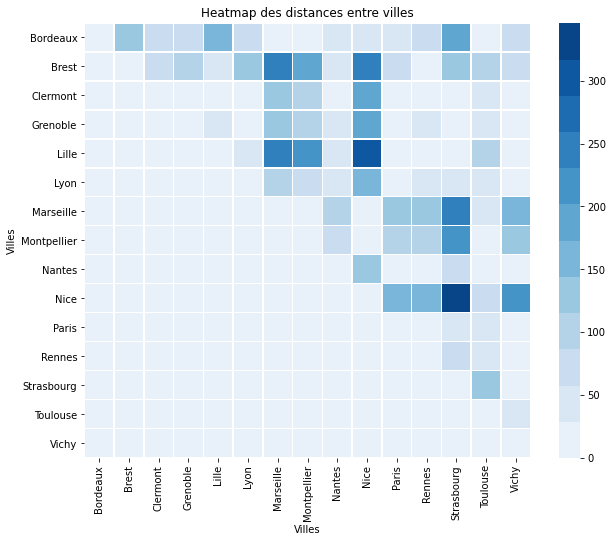

In [7]:
# Visualisation - heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(rowdist,xticklabels=rowdist.columns,yticklabels = rowdist.columns,
            cmap = sns.color_palette("Blues",12),linewidths=0.5)
plt.title('Heatmap des distances entre villes')
plt.show()

#### Matrice des corrélations

In [8]:
# Matrice de corrélation linéaire entre paires de variables
corr = donnee.corr(method = "pearson")
# Affichage
display(corr.round(2))

,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Jan,1.00,0.97,0.84,0.61,0.36,0.34,0.30,0.41,0.60,0.85,0.95,0.99
Fev,0.97,1.00,0.93,0.76,0.55,0.52,0.49,0.59,0.76,0.94,0.99,0.97
Mars,0.84,0.93,1.00,0.92,0.77,0.76,0.72,0.80,0.91,0.97,0.93,0.83
Avril,0.61,0.76,0.92,1.00,0.95,0.94,0.91,0.95,0.98,0.91,0.78,0.62
Mai,0.36,0.55,0.77,0.95,1.00,0.99,0.98,0.98,0.94,0.77,0.59,0.38
Juin,0.34,0.52,0.76,0.94,0.99,1.00,0.99,0.99,0.94,0.76,0.57,0.36
Juil,0.30,0.49,0.72,0.91,0.98,0.99,1.00,0.99,0.93,0.74,0.55,0.32
Août,0.41,0.59,0.80,0.95,0.98,0.99,0.99,1.00,0.97,0.81,0.64,0.43
Sept,0.60,0.76,0.91,0.98,0.94,0.94,0.93,0.97,1.00,0.93,0.80,0.62
Oct,0.85,0.94,0.97,0.91,0.77,0.76,0.74,0.81,0.93,1.00,0.96,0.87


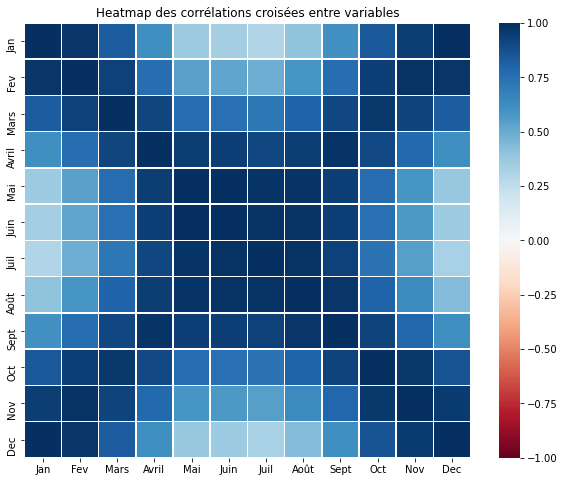

In [9]:
# heatmap de la matrice des corrélation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels = corr.columns,
            vmin = -1, vmax = +1, center = 0,
            cmap = 'RdBu',linewidths=0.5)
plt.title('Heatmap des corrélations croisées entre variables')
plt.show()

#### Centrage des données

In [10]:
# Centrage des données
def centrage(x):
    # x est un vecteur
    return (x-x.mean())

# Application
Y = donnee.transform(centrage)
# Affichage
display(Y.round(2))

,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Villes,,,,,,,,,,,,
Bordeaux,1.63,1.77,2.07,1.82,1.37,1.47,1.07,1.43,1.61,1.48,1.17,1.35
Brest,2.13,0.97,-0.43,-1.78,-2.83,-3.43,-4.23,-3.57,-2.29,-0.32,1.07,2.15
Clermont,-1.37,-1.13,-0.73,-0.68,-0.63,-0.53,-0.43,-0.47,-0.79,-1.12,-1.33,-1.25
Grenoble,-2.47,-1.63,-0.53,-0.38,0.07,-0.03,0.27,-0.07,-0.29,-0.92,-1.43,-2.55
Lille,-1.57,-1.93,-2.23,-2.08,-2.03,-2.53,-2.73,-2.47,-2.29,-1.92,-1.83,-1.35
Lyon,-1.87,-1.53,-0.53,-0.08,0.47,0.67,0.87,0.53,-0.09,-0.92,-1.23,-1.75
Marseille,1.53,1.77,1.77,2.02,2.37,2.97,3.47,3.23,2.91,2.68,2.27,2.05
Montpellier,1.63,1.87,1.67,1.82,1.77,2.27,2.87,2.73,2.31,2.28,2.07,1.65
Nantes,1.03,0.47,0.17,-0.18,-0.53,-0.63,-1.03,-0.97,-0.59,-0.12,0.27,0.65


#### Centrage et réduction des données

In [11]:
# Centrage et réduction des données
def StandardScaler(x):
    # x est vecteur
    return (x - x.mean())/x.std(ddof=0)

# Application
Z = donnee.transform(StandardScaler)
#Affichage
display(Z.round(2))

,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Villes,,,,,,,,,,,,
Bordeaux,0.84,0.98,1.40,1.33,0.94,0.85,0.52,0.74,0.90,0.84,0.67,0.72
Brest,1.10,0.54,-0.29,-1.30,-1.95,-1.98,-2.06,-1.83,-1.28,-0.18,0.62,1.14
Clermont,-0.71,-0.63,-0.50,-0.50,-0.44,-0.31,-0.21,-0.24,-0.44,-0.63,-0.76,-0.66
Grenoble,-1.28,-0.90,-0.36,-0.28,0.05,-0.02,0.13,-0.03,-0.16,-0.52,-0.82,-1.35
Lille,-0.81,-1.07,-1.51,-1.52,-1.40,-1.46,-1.33,-1.27,-1.28,-1.09,-1.05,-0.71
Lyon,-0.97,-0.85,-0.36,-0.06,0.32,0.38,0.42,0.27,-0.05,-0.52,-0.70,-0.92
Marseille,0.79,0.98,1.20,1.48,1.63,1.71,1.69,1.66,1.63,1.52,1.30,1.09
Montpellier,0.84,1.03,1.13,1.33,1.22,1.31,1.39,1.41,1.30,1.29,1.19,0.87
Nantes,0.53,0.26,0.11,-0.13,-0.37,-0.37,-0.50,-0.50,-0.33,-0.07,0.16,0.35


In [12]:
Z.corr(method = "pearson").round(2)

,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Jan,1.00,0.97,0.84,0.61,0.36,0.34,0.30,0.41,0.60,0.85,0.95,0.99
Fev,0.97,1.00,0.93,0.76,0.55,0.52,0.49,0.59,0.76,0.94,0.99,0.97
Mars,0.84,0.93,1.00,0.92,0.77,0.76,0.72,0.80,0.91,0.97,0.93,0.83
Avril,0.61,0.76,0.92,1.00,0.95,0.94,0.91,0.95,0.98,0.91,0.78,0.62
Mai,0.36,0.55,0.77,0.95,1.00,0.99,0.98,0.98,0.94,0.77,0.59,0.38
Juin,0.34,0.52,0.76,0.94,0.99,1.00,0.99,0.99,0.94,0.76,0.57,0.36
Juil,0.30,0.49,0.72,0.91,0.98,0.99,1.00,0.99,0.93,0.74,0.55,0.32
Août,0.41,0.59,0.80,0.95,0.98,0.99,0.99,1.00,0.97,0.81,0.64,0.43
Sept,0.60,0.76,0.91,0.98,0.94,0.94,0.93,0.97,1.00,0.93,0.80,0.62
Oct,0.85,0.94,0.97,0.91,0.77,0.76,0.74,0.81,0.93,1.00,0.96,0.87


#### Distance euclidienne pondérée

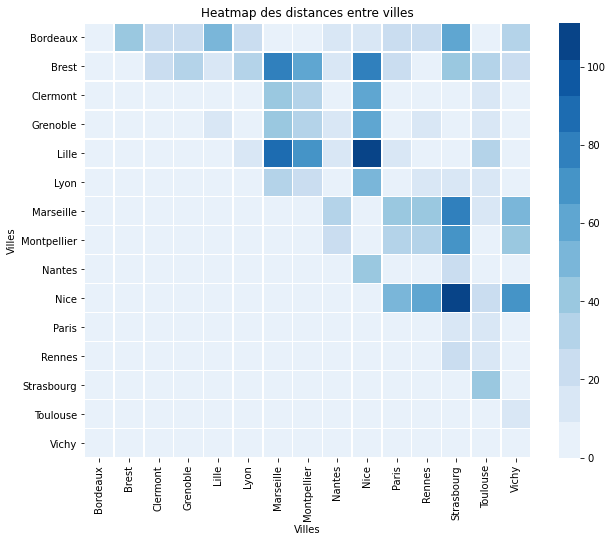

In [13]:
# Calcul de la distance euclidienne pondérée
dist = pd.DataFrame(np.zeros(shape=(n,n),dtype=float),index = donnee.index,
                    columns = donnee.index)
for i in range(n):
    for j in range(i+1,n):
        dist.values[i,j] = distance(Z.values[i,:],Z.values[j,:])

# Visualisation - heatmap
plt.figure(figsize = (10,8))
sns.heatmap(dist,xticklabels=dist.columns,yticklabels = dist.columns,
            cmap = sns.color_palette("Blues",12),linewidths=0.5)
plt.title('Heatmap des distances entre villes')
plt.show()

#### Notion d'inertie

In [14]:
# Inertie : moyenne des carrés des distances
InK = (1/n**2)*rowdist.sum().sum()
print('Inertie totale : %.2f'%(InK))

Inertie totale : 37.12


In [15]:
# Moyennes des variables
meanvar = donnee.mean(axis=0)

# Inertie totale
distorig = donnee.apply(lambda x:np.sum((x-meanvar)**2), axis = 1)
InK2 = (1/n)*distorig.sum()
print('Inertie totale : %.2f'%(InK2))

Inertie totale : 37.12


In [16]:
# Vérification - variance des variables
variancevar = donnee.var(ddof = 0)

# Inertie totale
InK3 = variancevar.sum()
print('Inertie totale : %.2f'%(InK3))

Inertie totale : 37.12


In [17]:
# Inertie sur données centrées et réduites
print('Inertie totale (donnée centrée réduite) : %.1f'%(Z.var(ddof=0).sum()))

Inertie totale (donnée centrée réduite) : 12.0


#### Distance des individus à l'origine

In [18]:
# Information sur les individus
rowdisto = Z.apply(lambda x : np.sum((x)**2),axis=1)
rowweight = np.ones(n)/n
rowinertie = rowweight*rowdisto.values
rowinfos = pd.DataFrame(np.transpose([rowdisto,rowweight, rowinertie]),
                       columns = ["Disto2", "Poids", "Inertie"],
                       index = donnee.index)
display(rowinfos.round(3))

,Disto2,Poids,Inertie
Villes,,,
Bordeaux,10.287,0.067,0.686
Brest,21.948,0.067,1.463
Clermont,3.386,0.067,0.226
Grenoble,5.452,0.067,0.363
Lille,18.303,0.067,1.220
Lyon,3.913,0.067,0.261
Marseille,24.222,0.067,1.615
Montpellier,17.449,0.067,1.163
Nantes,1.402,0.067,0.093


In [19]:
# Informations sur les variables
rowmean = Z.mean(axis=1)
vardisto = Z.apply(lambda x : np.sum((x-rowmean)**2)/n,axis=0)
varweight = np.ones(p)/p
varinertie = varweight*vardisto.values
varinfos = pd.DataFrame(np.transpose([vardisto,varweight, varinertie]),
                       columns = ["Disto2", "Poids", "Inertie"],
                       index = donnee.columns)
display(varinfos)

,Disto2,Poids,Inertie
Jan,0.423027,0.083333,0.035252
Fev,0.214941,0.083333,0.017912
Mars,0.065337,0.083333,0.005445
Avril,0.071293,0.083333,0.005941
Mai,0.248839,0.083333,0.020737
Juin,0.265664,0.083333,0.022139
Juil,0.305655,0.083333,0.025471
Août,0.202011,0.083333,0.016834
Sept,0.063150,0.083333,0.005262
Oct,0.043864,0.083333,0.003655


In [20]:
np.sum(varinertie)

0.20649837071748423

### ACP via la diagonalisation de la matrice des corrélations

In [21]:
# Diagonalisation de la matrice des corrélations
eigenvalue, eigenvector = np.linalg.eig(corr)

In [22]:
# eigenvalue dataframe
percent = np.array([100*x/sum(eigenvalue) for x in eigenvalue])
cumpercent = np.cumsum(percent)
columns = ['valeur propre','pourcentage d\'inertie',
           'pourcentage d\'inertie cumulée']
index = ['Dim.{}'.format(x+1) for x in range(p)]
Eigen = pd.DataFrame(np.transpose([eigenvalue,percent,cumpercent]),
                     index=index,columns = columns)
Eigen.index.name = 'Dimension'
# Affichage
display(Eigen.round(2))

,valeur propre,pourcentage d'inertie,pourcentage d'inertie cumulée
Dimension,,,
Dim.1,9.58,79.85,79.85
Dim.2,2.28,18.97,98.82
Dim.3,0.07,0.58,99.40
Dim.4,0.04,0.33,99.73
Dim.5,0.01,0.12,99.85
Dim.6,0.01,0.07,99.92
Dim.7,0.01,0.05,99.97
Dim.8,0.00,0.01,99.98
Dim.9,0.00,0.01,99.99


### ACP via la décomposition en valeurs singulières

Rappellons que la SVD (singular Values Decomposition) ou décomposition en valeurs singulières d'une matrix $X$ de taille $n\times p$ consiste à calculer les valeurs singulières $\lambda = \left(\lambda_{1},\dots,\lambda_{p}\right)$ (triées par ordre décroissant) et les matrices unitaires $U = \left[\mu_{1},\dots,\mu_{n}\right]$ et $V = \left[\nu_{1},\dots,\nu_{p}\right]$ tels que $$X = \displaystyle \sum_{k}^{p}\lambda_{k}\mu_{k}\nu_{k}^{T}=U\text{diag}(\lambda)V^{T}$$

Les colonnes $\nu_{k}$ de $\textbf{V}$ sont $\textbf{les axes principaux}$ et les vecteurs $\lambda_{k}\mu_{k}$ sont les $\textbf{composantes principales}$.

En python, c'est la fonction $\textbf{np.linalg.svd}$ qui effectue la SVD d'une amtrice. Elle renvoie les valeurs singulières $\lambda$ et les matrices unitaires $\textbf{U}$ et $\textbf{V}$.

Pour l'ACP, nous effectuons la SVD du tableau des données centrées.

In [23]:
# Décomposition en valeurs singulières
U, delta ,V  = np.linalg.svd(Z,full_matrices=False)

In [24]:
# Correction des delta
lambd = delta**2/n
# Affichage de delta et lambda
display(pd.DataFrame(np.array([delta,lambd]),columns = index,
                   index=['delta','lambda']).round(2))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
delta,11.99,5.84,1.02,0.77,0.46,0.35,0.30,0.16,0.15,0.09,0.07,0.02
lambda,9.58,2.28,0.07,0.04,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00


#### Valeurs propres

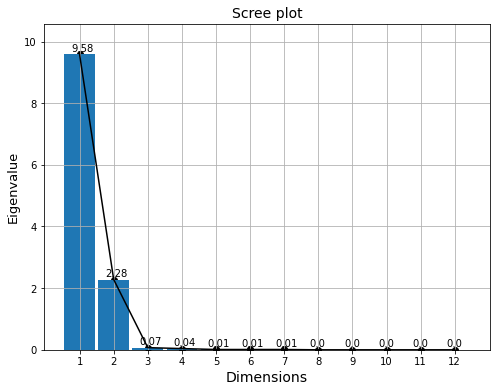

In [25]:
# Visualisation des valeurs propres
def screeplot(data,choice=None,figsize=None):
    #
    p = data.shape[0]
    fig,axes = plt.subplots(figsize = figsize); axes.grid()
    axes.set_xlabel('Dimensions',fontsize=14)
    axes.set_title('Scree plot',fontsize=14)
    axes.set_xticks([x for x in range(1,p+1)])
    if choice is None or choice=='scree plot':
        eigen = data.iloc[:,0].round(2)
        ylim = np.max(eigen)+1
        axes.set_ylim(0,ylim)
        axes.bar(np.arange(1,p+1),eigen.values,width=0.9)
        axes.plot(np.arange(1,p+1),eigen.values,c="black")
        axes.set_ylabel('Eigenvalue',fontsize=13)
        ## Add text
        for i in range(p):
            axes.scatter(i+1,eigen.values[i],color='black',alpha=1)
            axes.text(i+.75,0.10+eigen.values[i],str(eigen.values[i]),
                     color = 'black')
    elif choice == "percentage":
        percent = data.iloc[:,1].round()
        axes.set_ylim(0,100)
        axes.bar(np.arange(1,p+1),percent.values,width=0.9)
        axes.plot(np.arange(1,p+1),percent.values,c="black")
        axes.set_ylabel('Percentage of variance',fontsize=13)
        ## Add text
        for i in range(p):
            axes.scatter(i+1,percent.values[i],color='black',alpha=1)
            axes.text(i+.6,0.10+percent.values[i],f'{percent.values[i]}%',
                     color = 'black',fontweight='bold',fontsize=12)
    elif choice == "cumulative":
        cumul = data.iloc[:,2].round()
        axes.set_ylim(0,105)
        axes.bar(np.arange(1,p+1),cumul.values,width=0.9)
        axes.set_ylabel('Cumulative percentage of variance',fontsize=13)
    plt.show()
# Affichage
screeplot(data=Eigen,figsize=(8,6))

#### Coordonnées des individus

In [26]:
# coordonnées factorielles des individus
rowcoord = pd.DataFrame(np.dot(Z,eigenvector),index = donnee.index,
                       columns = index)
# Affichage
display(rowcoord.loc[:,['Dim.1','Dim.2']].T.round(2))

Villes,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
Dim.1,3.12,-2.27,-1.73,-1.53,-4.22,-0.83,4.83,4.15,-0.28,6.01,-1.24,-1.44,-4.11,1.74,-2.20
Dim.2,-0.11,-4.09,0.59,1.69,-0.60,1.79,0.83,0.44,-1.11,-0.79,0.16,-1.67,2.17,0.14,0.58


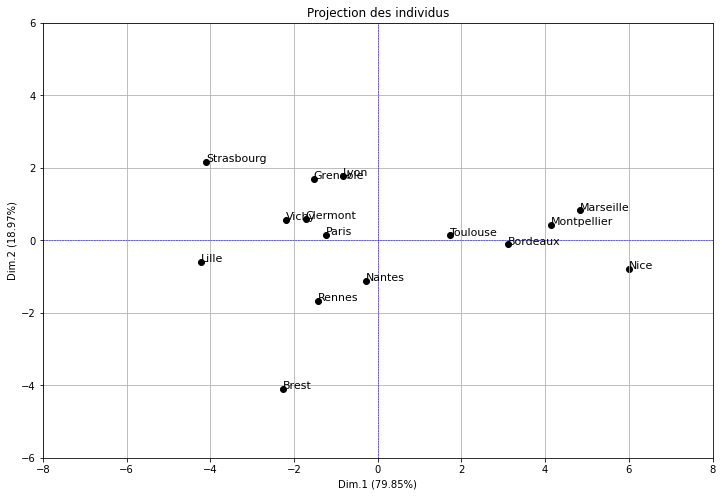

In [27]:
# Fonction de visualisation en 2D
def pca_row_plot(data,eigen,axei,axej,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            # set limite
            n = data.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)

            # Graphique
            fig, axes = plt.subplots(figsize = figsize); axes.grid()
            axes.axis([-8,8,-6,6])
            axes.set_title("Projection des individus")
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            for i in range(n):
                plt.scatter(data.iloc[i,axei], data.iloc[i,axej],
                            c = "black", alpha = 1)
                axes.text(data.iloc[i,axei],data.iloc[i,axej],data.index[i],
                          color = "black", fontsize = 11)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    # if false then raise the value error
    except ValueError as e:
            print(e) 

# Nuage des individus sur les axes 1 et 2
pca_row_plot(data=rowcoord,
             eigen=eigenvalue,
             axei=0,
             axej=1,
             figsize=(12,8))

#### Distance entre variables

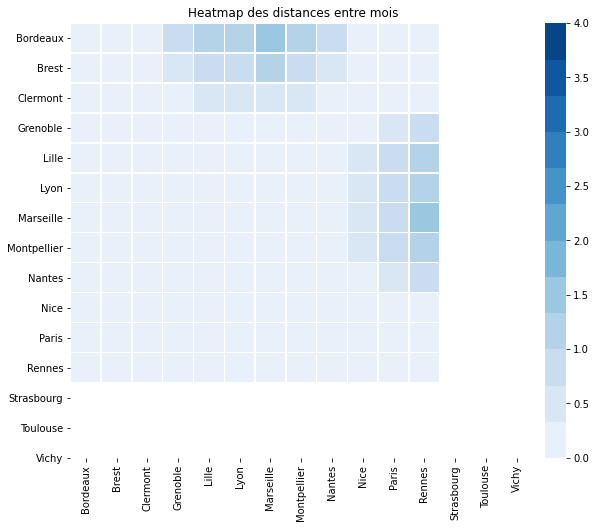

In [28]:
# Distance en variables
vardist = pd.DataFrame(np.zeros(shape=(p,p),dtype=float),index = donnee.columns,
                       columns = donnee.columns)
for j in range(p):
    for k in range(j+1,p):
        vardist.iloc[j,k] = 2*(1-corr.iloc[j,k])
# Visualisation - heatmap
plt.figure(figsize = (10,8))
sns.heatmap(vardist,xticklabels=dist.columns,yticklabels = dist.columns,
            vmin = 0, vmax = 4,cmap = sns.color_palette("Blues",12),linewidths=0.5)
plt.title('Heatmap des distances entre mois')
plt.show()

#### Coordonnées des variables

In [29]:
# coordonnées des variables
varcoord = pd.DataFrame(eigenvector*np.sqrt(eigenvalue),columns = index,
                       index = donnee.columns)
varcoord.index.name = 'mois'
# Affichage
display(varcoord.loc[:,['Dim.1','Dim.2']].T.round(2))

mois,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Dim.1,0.76,0.88,0.97,0.97,0.87,0.86,0.84,0.90,0.97,0.98,0.90,0.77
Dim.2,-0.64,-0.47,-0.16,0.20,0.47,0.50,0.53,0.43,0.21,-0.17,-0.41,-0.62


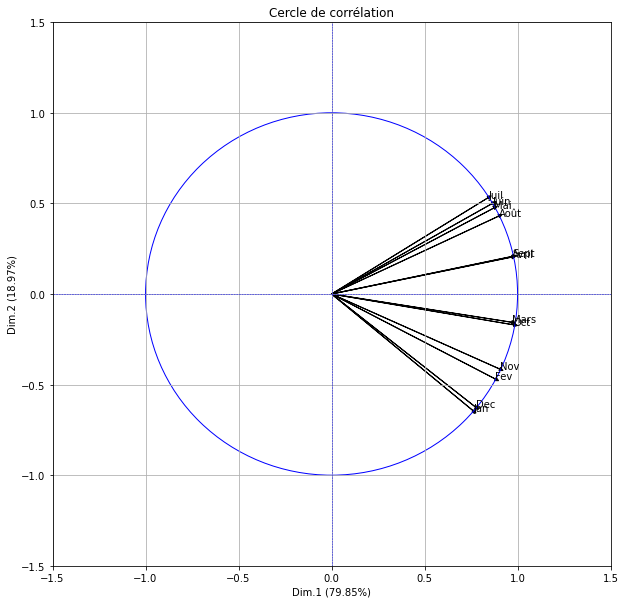

In [30]:
# Visualisation du nuage des variables (=Cercle de corrélation)
def pca_var_plot(data,eigen,axei,axej,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            p = data.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            
            # Graphique
            fig, axes = plt.subplots(figsize = figsize)
            axes.grid()
            axes.axis([-1.5,1.5,-1.5,1.5])
            axes.set_title("Cercle de corrélation")
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            for j in range(p):
                axes.arrow(0,0,data.iloc[j,axei],data.iloc[j,axej],
                           head_width = 0.02,head_length = 0.02,color='black')
                axes.text(data.iloc[j,axei],data.iloc[j,axej],data.index[j],
                          color = "black")
            # cercle
            from matplotlib.patches import Ellipse
            ellipse = Ellipse((0,0),width = 2, height = 2,facecolor = "none", 
                              edgecolor = "blue")
            axes.add_patch(ellipse)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
    # if false then raise the value error
    except ValueError as e:
            print(e)  

# Nuage des variables
pca_var_plot(data=varcoord,
             eigen=eigenvalue,
             axei=0,
             axej=1,
             figsize=(10,10))

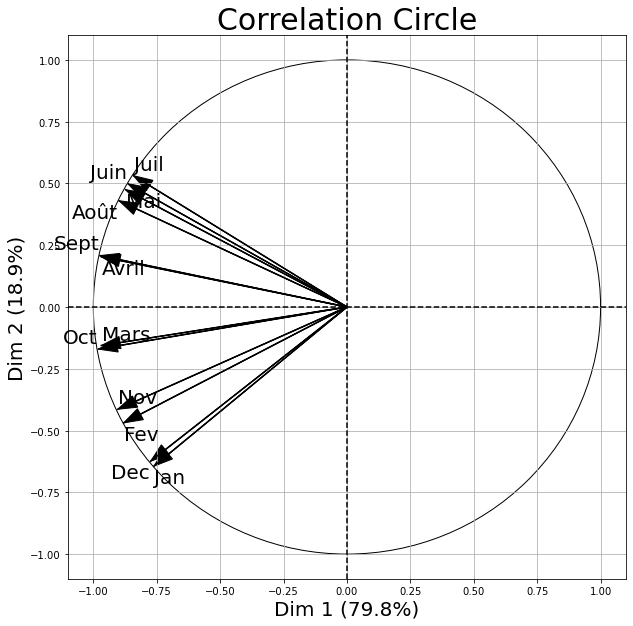

In [31]:
# Cercle des corrélations des variables
from mlxtend.plotting import plot_pca_correlation_graph

fig,corr_mat = plot_pca_correlation_graph(Z.values,Z.columns,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)
plt.grid(True)
plt.show()

In [32]:
display(corr_mat)

,Dim 1,Dim 2
mois,,
Jan,-0.761238,-0.644338
Fev,-0.880458,-0.469079
Mars,-0.968770,-0.156008
Avril,-0.969336,0.203674
Mai,-0.872765,0.474709
Juin,-0.863575,0.499346
Juil,-0.841535,0.531420
Août,-0.898606,0.429939
Sept,-0.974029,0.208101


In [33]:
# coordonnées des individus
rowcoord_svd = pd.DataFrame(U * delta.reshape(1, -1),index = donnee.index,
                       columns = index)
# Affichage axe 1 et axe 2
display(rowcoord_svd.loc[:,['Dim.1','Dim.2']].T.round(2))

Villes,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
Dim.1,-3.12,2.27,1.73,1.53,4.22,0.83,-4.83,-4.15,0.28,-6.01,1.24,1.44,4.11,-1.74,2.20
Dim.2,-0.11,-4.09,0.59,1.69,-0.60,1.79,0.83,0.44,-1.11,-0.79,0.16,-1.67,2.17,0.14,0.58


In [34]:
# Coordonnées factorielles des variables
varcoord_svd = pd.DataFrame(V.T.dot(np.diag(np.sqrt(lambd))),
                           index = donnee.columns, columns = index)
varcoord_svd.index.name = 'mois'
display(varcoord_svd.loc[:,['Dim.1','Dim.2']].T.round(2))

mois,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Dim.1,-0.76,-0.88,-0.97,-0.97,-0.87,-0.86,-0.84,-0.90,-0.97,-0.98,-0.90,-0.77
Dim.2,-0.64,-0.47,-0.16,0.20,0.47,0.50,0.53,0.43,0.21,-0.17,-0.41,-0.62


### Relation de transition

#### Coordonées de l'individu i

In [35]:
# relation de transition - coordonnées des individus
transition1 = Z.dot(varcoord)/np.sqrt(eigenvalue)
display(transition1.iloc[:,[0,1]].round(2))

,Dim.1,Dim.2
Villes,,
Bordeaux,3.12,-0.11
Brest,-2.27,-4.09
Clermont,-1.73,0.59
Grenoble,-1.53,1.69
Lille,-4.22,-0.60
Lyon,-0.83,1.79
Marseille,4.83,0.83
Montpellier,4.15,0.44
Nantes,-0.28,-1.11


#### Coordonnées de la variable k

In [36]:
# relation de transition - coordonnées des variables
transition2 = Z.T.dot(rowcoord)/(n*np.sqrt(eigenvalue))
display(transition2.iloc[:,[0,1]].T.round(2))

mois,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Dim.1,0.76,0.88,0.97,0.97,0.87,0.86,0.84,0.90,0.97,0.98,0.90,0.77
Dim.2,-0.64,-0.47,-0.16,0.20,0.47,0.50,0.53,0.43,0.21,-0.17,-0.41,-0.62


#### Biplot

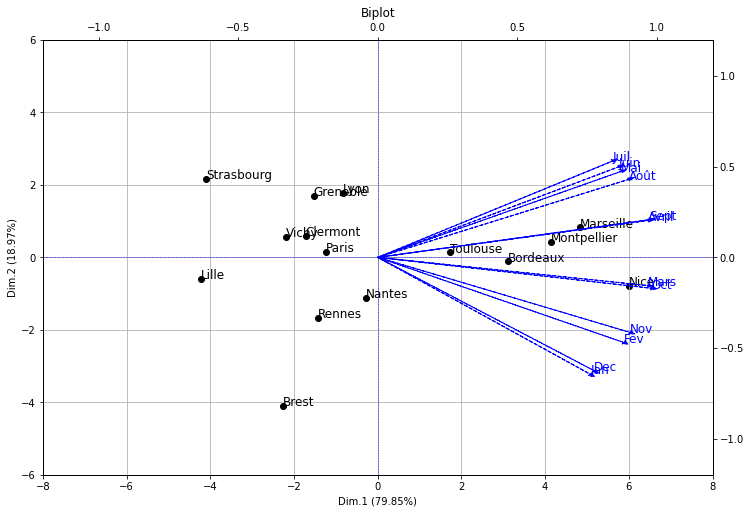

In [37]:
# Nuage simultané
def biplot(data1,data2,eigen,axei,axej,figsize=None):
    # Représentation simultanée des indvidus et des variables
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            n,p = data1.shape
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            
            # Biplot
            fig = plt.figure(figsize=(12,8))
            axes1 = fig.add_subplot(111)
            axes2 = axes1.twiny()
            axes2 = axes2.twinx()
            axes1.grid()
            axes2.axis([-1.2,1.2,-1.2,1.2])
            axes1.axis([-8,8,-6,6])
            axes1.set_title("Biplot")
            axes1.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes1.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            # Affichage des individus
            for i in range(n):
                axes1.scatter(data1.iloc[i,0],data1.iloc[i,1],c = "black",
                              alpha = 1)
                axes1.text(data1.iloc[i,0],data1.iloc[i,1],data1.index[i],
                           color = "black",fontsize=12)
            # Affichage des variables
            for k in range(p):
                axes2.arrow(0,0,data2.iloc[k,0],data2.iloc[k,1],
                            head_width = 0.02,head_length = 0.02,
                            color='blue',linestyle='--')
                axes2.text(data2.iloc[k,0],data2.iloc[k,1],data2.index[k],
                           color = "blue",fontsize=12)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    except ValueError as e:
            print(e)  

# Affichage
biplot(data1=rowcoord,data2=varcoord,eigen=eigenvalue,axei=0,axej=1,
       figsize=(10,10))

## Outils d'aide à l'interprétation

### Analyse du point de vue des individus

#### Contributions factorielles des individus

In [38]:
# contributions factorielles des individus
rowcontrib = rowcoord.apply(lambda x: 100*x**2/(n*eigenvalue),axis=1)
# Affichage
display(rowcontrib.iloc[:,[0,1]].T.round(2))

Villes,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
Dim.1,6.78,3.58,2.07,1.63,12.37,0.49,16.25,11.97,0.06,25.11,1.07,1.44,11.73,2.10,3.37
Dim.2,0.03,49.07,1.03,8.34,1.04,9.36,2.01,0.56,3.64,1.82,0.07,8.18,13.82,0.05,0.97


In [39]:
# vérifions la théorie
display(rowcontrib.sum(axis=0))

Dim.1     100.0
Dim.2     100.0
Dim.3     100.0
Dim.4     100.0
Dim.5     100.0
Dim.6     100.0
Dim.7     100.0
Dim.8     100.0
Dim.9     100.0
Dim.10    100.0
Dim.11    100.0
Dim.12    100.0
dtype: float64

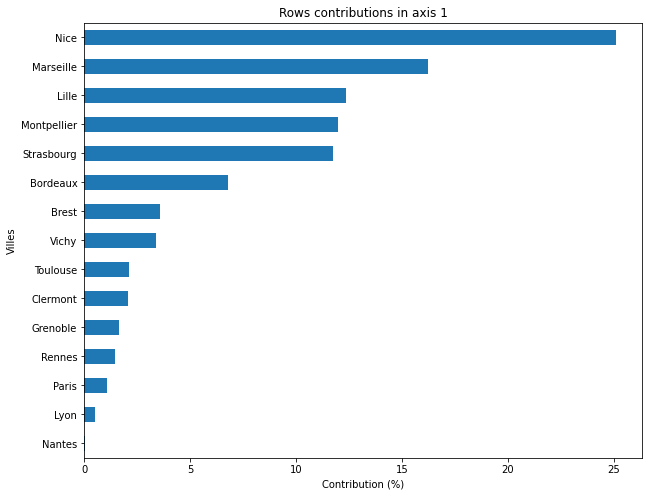

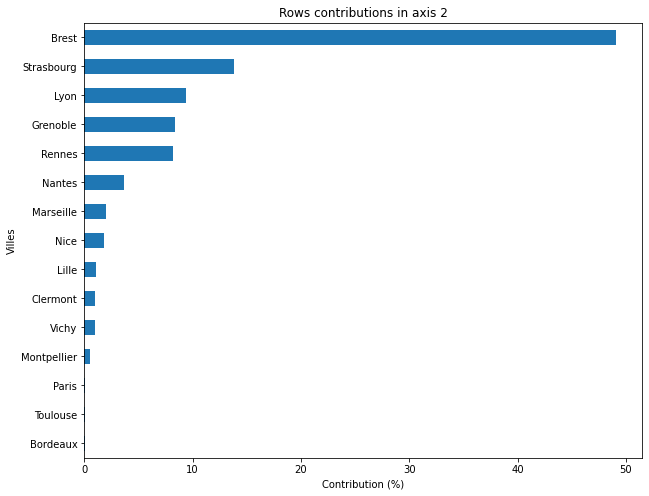

In [40]:
# Affichage graphique des contributions
def plot_graph(data,axis,xlabel,title,figsize=None):
    p = data.shape[1]
    try:
        if axis<0 or axis>p:
            raise ValueError(f'axis doit être compris entre {0} et {p-1}.')
        else:
            sort = data.sort_values(by=f'Dim.{1+axis}', ascending=True)
            sort.iloc[:,axis].plot.barh(figsize=figsize)
            plt.xlabel(xlabel)
            plt.title(f'{title} in axis {1+axis}')
            plt.show()
    except ValueError as f:
        print(f)   

# Contribution axe 1
plot_graph(data=rowcontrib,
           axis=0,
           xlabel = 'Contribution (%)',
           title = 'Rows contributions',
           figsize=(10,8))

# Contribution axe 2
plot_graph(data=rowcontrib,
           axis=1,
           xlabel = 'Contribution (%)',
           title = 'Rows contributions',
           figsize=(10,8))

### Cosinus carré des individus

In [41]:
# Cosinus carré des individus
rowcos2 = rowcoord.apply(lambda x : x**2/rowdisto, axis=0)
#Affichage
display(rowcos2.iloc[:,[0,1]].T.round(2))

Villes,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
Dim.1,0.95,0.23,0.88,0.43,0.97,0.18,0.96,0.99,0.06,0.98,0.89,0.42,0.78,0.95,0.92
Dim.2,0.00,0.76,0.10,0.52,0.02,0.82,0.03,0.01,0.89,0.02,0.01,0.57,0.22,0.01,0.06


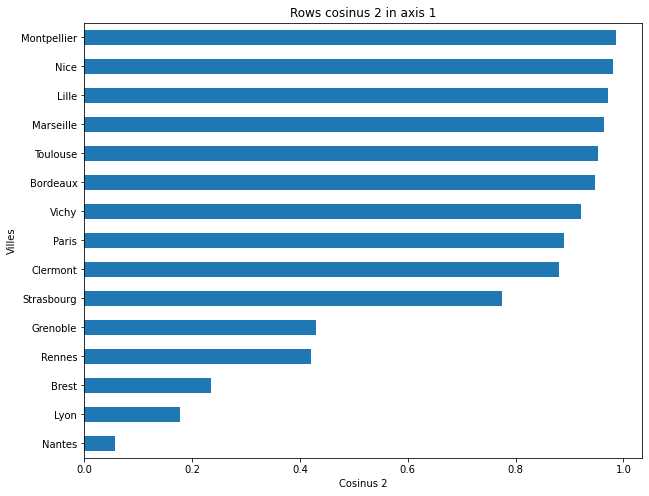

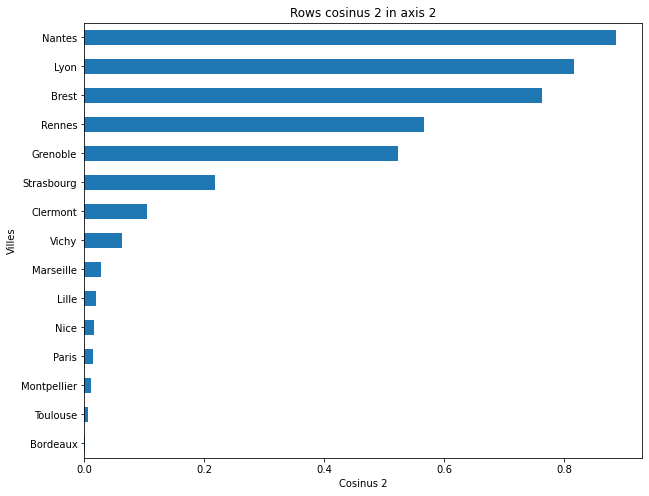

In [42]:
# Cosinus carré axe 1
plot_graph(data=rowcos2,
           axis=0,
           xlabel = 'Cosinus 2',
           title = 'Rows cosinus 2',
           figsize=(10,8))

# Cosinus carré axe 2
plot_graph(data=rowcos2,
           axis=1,
           xlabel = 'Cosinus 2',
           title = 'Rows cosinus 2',
           figsize=(10,8))

### Analyse du point de vue des variables

#### Contributions des variables

In [43]:
# contributions factorielles des variables
varcontrib = varcoord.apply(lambda x : 100*x**2/eigenvalue,axis=1)
# Affichage
display(varcontrib.iloc[:,[0,1]].T.round(2))

mois,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Dim.1,6.05,8.09,9.79,9.81,7.95,7.78,7.39,8.43,9.9,10.03,8.52,6.26
Dim.2,18.24,9.67,1.07,1.82,9.90,10.95,12.41,8.12,1.9,1.28,7.53,17.12


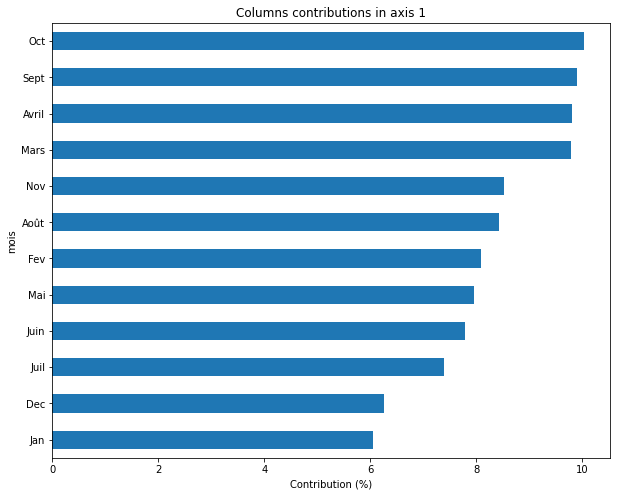

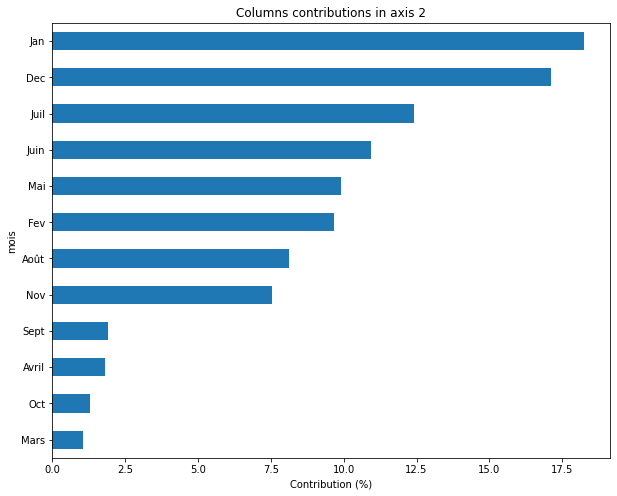

In [44]:
# Contribution variable axe 1
plot_graph(data=varcontrib,
           axis=0,
           xlabel = 'Contribution (%)',
           title = 'Columns contributions',
           figsize=(10,8))

# Contribution variable axe 2
plot_graph(data=varcontrib,
           axis=1,
           xlabel = 'Contribution (%)',
           title = 'Columns contributions',
           figsize=(10,8))

#### Cosinus carré des variables

In [45]:
# Cosinus carré des variables
varcos2 = varcoord.apply(lambda x : x**2)
# Affichage
display(varcos2.iloc[:,[0,1]].T.round(2))

mois,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Dim.1,0.58,0.78,0.94,0.94,0.76,0.75,0.71,0.81,0.95,0.96,0.82,0.60
Dim.2,0.42,0.22,0.02,0.04,0.23,0.25,0.28,0.18,0.04,0.03,0.17,0.39


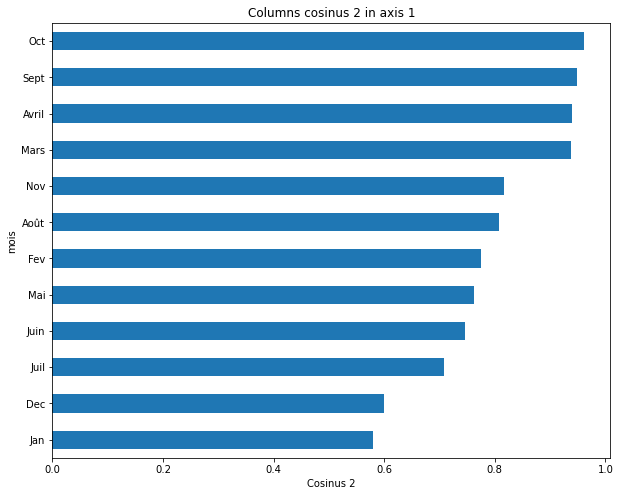

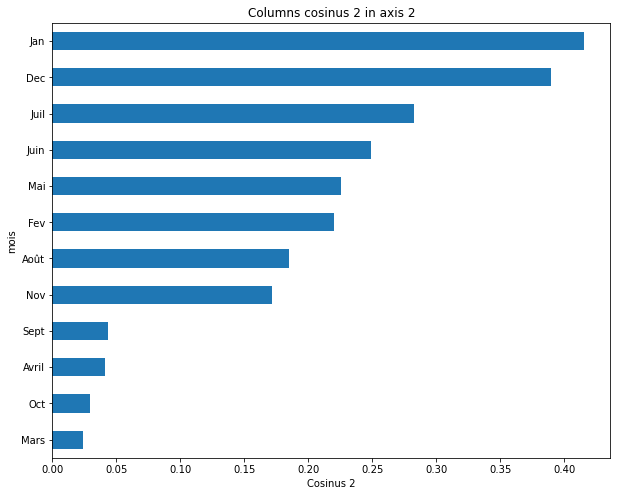

In [46]:
# Cosinus carré variable axe 1
plot_graph(data=varcos2,
           axis=0,
           xlabel = 'Cosinus 2',
           title = 'Columns cosinus 2',
           figsize=(10,8))

# Cosinus carré variable axe 2
plot_graph(data=varcos2,
           axis=1,
           xlabel = 'Cosinus 2',
           title = 'Columns cosinus 2',
           figsize=(10,8))

## Elements supplémentaires

### Individus supplémentaires

In [47]:
# individus supplémentaires
ind_sup = pd.read_excel('temperature.xlsx',sheet_name=3,header=0,index_col=0)

In [48]:
# statistiques descriptives
display(ind_sup.describe(include='all').round(2))

,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,2.69,3.22,6.11,9.68,14.12,17.34,19.52,19.19,16.07,11.91,7.09,4.14
std,4.22,4.11,3.47,3.04,3.07,3.48,3.81,3.85,3.73,3.57,3.86,4.03
min,-3.70,-2.00,1.30,5.80,10.40,13.30,15.00,14.60,12.70,8.60,2.60,-1.70
25%,-0.35,0.28,4.68,7.98,12.58,15.42,17.28,17.23,13.88,9.77,4.42,1.23
50%,3.00,2.70,5.80,8.55,13.05,15.80,18.10,17.70,14.60,11.20,6.70,4.40
75%,4.42,4.58,6.58,10.92,16.20,19.38,21.10,20.48,16.42,11.48,6.95,5.22
max,9.10,10.30,11.80,15.40,20.10,24.50,27.40,27.20,23.80,19.20,14.60,11.00


In [49]:
# dimensions
m,p = ind_sup.shape
print(f'm = {m} et p = {p}')

m = 10 et p = 12


In [50]:
# Normalisation des données supplémentaires
A = ind_sup.apply(lambda x : (x-donnee.mean(axis=0))/donnee.std(ddof=0,axis=0),
                   axis=1)
display(A.round(2))

,Jan,Fev,Mars,Avril,Mai,Juin,Juil,Août,Sept,Oct,Nov,Dec
Villes,,,,,,,,,,,,
Amsterdam,-0.55,-1.29,-1.71,-2.03,-1.33,-1.75,-1.33,-1.27,-1.39,-0.52,-0.53,-0.24
Anvers,-0.45,-1.07,-1.38,-1.52,-1.05,-1.35,-0.94,-1.01,-1.28,-0.46,-0.65,-0.08
Athènes,2.64,2.70,2.35,3.23,3.90,3.85,3.68,3.93,3.82,3.89,3.83,3.25
Barcelone,2.64,3.03,2.41,2.28,2.04,1.94,2.12,2.33,2.64,2.93,2.97,2.72
Berlin,-2.15,-2.62,-2.59,-2.03,-0.44,-1.06,-0.75,-0.81,-1.45,-1.31,-2.14,-1.93
Bruxelles,-0.35,-0.85,-1.04,-1.52,-1.12,-1.29,-0.99,-0.91,-1.11,-0.69,-0.70,-0.24
Budapest,-2.62,-2.23,-1.85,0.45,1.77,1.37,1.05,0.89,-0.05,-0.58,-1.62,-2.19
Copenhague,-2.26,-2.90,-4.69,-3.79,-2.29,-1.40,-1.33,-1.53,-2.06,-1.99,-2.20,-1.87
Cracovie,-3.96,-3.79,-4.29,-2.25,-0.85,-0.54,-0.70,-1.01,-1.84,-2.10,-3.06,-3.46


In [51]:
# coordonnées factorielles des villes supplémentaires
rowsupcoord = pd.DataFrame(np.zeros(shape=(m,p),dtype=float),columns = index,
                           index = ind_sup.index)
for j in range(p):
    rowsupcoord.iloc[:,j] = 1/np.sqrt(eigenvalue[j])*A.dot(varcoord.iloc[:,j])

# Affichage
rowsupcoord.index.name = 'villes'
display(rowsupcoord.iloc[:,[0,1]].T.round(2))

villes,Amsterdam,Anvers,Athènes,Barcelone,Berlin,Bruxelles,Budapest,Copenhague,Cracovie,Dublin
Dim.1,-4.09,-3.30,11.84,8.66,-5.56,-3.17,-1.51,-8.27,-7.97,-5.34
Dim.2,-1.18,-0.85,0.83,-1.22,2.08,-0.86,5.11,1.07,4.28,-3.75


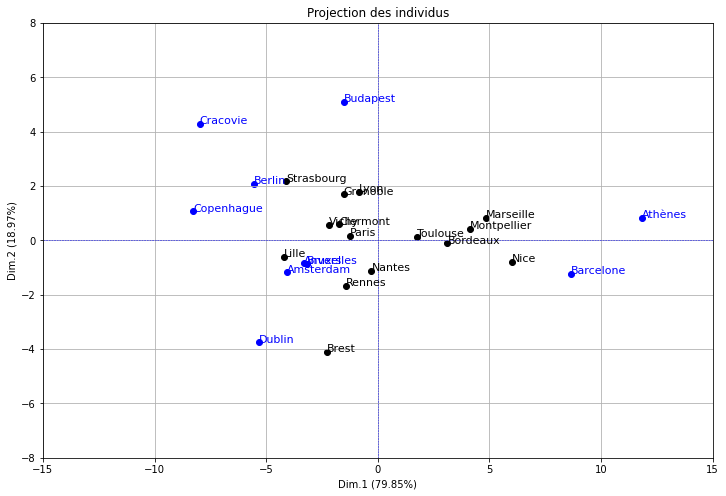

In [52]:
# Fonction de visualisation en 2D
def pca_rowsup_plot(data1,data2,eigen,axei,axej,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            n = data1.shape[0]
            m = data2.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)

            # Graphique
            fig, axes = plt.subplots(figsize = figsize); axes.grid()
            axes.axis([-15,15,-8,8])
            axes.set_title("Projection des individus")
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            # Positionnement des individus actifs
            for i in range(n):
                plt.scatter(data1.iloc[i,axei], data1.iloc[i,axej],
                            c = "black", alpha = 1)
                axes.text(data1.iloc[i,axei],data1.iloc[i,axej],data1.index[i],
                          color = "black", fontsize = 11)
            # positionnement des individus illustratifs
            for j in range(m):
                plt.scatter(data2.iloc[j,axei], data2.iloc[j,axej],
                            c = "blue", alpha = 1)
                axes.text(data2.iloc[j,axei],data2.iloc[j,axej],data2.index[j],
                          color = "blue", fontsize = 11)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    # if false then raise the value error
    except ValueError as e:
            print(e)    

# Nuage des individus
pca_rowsup_plot(data1 = rowcoord,
                data2 = rowsupcoord,
                eigen = eigenvalue,
                axei = 0,
                axej = 1,
                figsize=(12,8))

#### Variables supplémentaires quantitatives

In [53]:
# variables supplémentaires quantitatives
vsQuant = pd.read_excel('temperature.xlsx',sheet_name=1,header=0,index_col=0)

In [54]:
# Dimensions des variables supplémentaires
n, q = vsQuant.shape
print(f'm = {n} et q = {q}')

m = 15 et q = 4


In [55]:
# corrélation avec les axes factorielles
varsupcoord = pd.DataFrame(np.zeros(shape=(q,p),dtype=float),columns = index,
                           index = vsQuant.columns)
for k in range(q):
    for l in range(p):
        varsupcoord.iloc[k,l] = np.corrcoef(vsQuant.iloc[:,k],
                                            rowcoord.iloc[:,l])[1,0]

# Affichage
display(varsupcoord.iloc[:,[0,1]].T.round(2))

,moy,amp,Lati,Long
Dim.1,1.00,0.10,-0.84,0.17
Dim.2,-0.02,0.99,-0.31,0.79


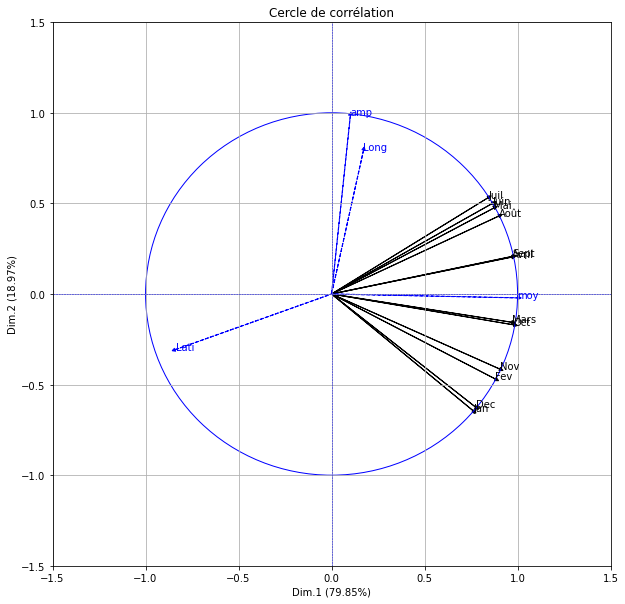

In [56]:
# Visualisation du nuage des variables (=Cercle de corrélation)
def pca_varsup_plot(data1,data2,eigen,axei,axej,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            p = data1.shape[0]
            q = data2.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            
            # Graphique
            fig, axes = plt.subplots(figsize = figsize)
            axes.grid()
            axes.axis([-1.5,1.5,-1.5,1.5])
            axes.set_title("Cercle de corrélation")
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            for j in range(p):
                axes.arrow(0,0,data1.iloc[j,axei],data1.iloc[j,axej],
                           head_width = 0.02,head_length = 0.02,color='black')
                axes.text(data1.iloc[j,axei],data1.iloc[j,axej],data1.index[j],
                          color = "black")
            for k in range(q):
                axes.arrow(0,0,data2.iloc[k,axei],data2.iloc[k,axej],
                           head_width = 0.02, head_length = 0.02,
                           color='blue',linestyle='--')
                axes.text(data2.iloc[k,axei],data2.iloc[k,axej],data2.index[k],
                          color = "blue")
            # cercle
            from matplotlib.patches import Ellipse
            ellipse = Ellipse((0,0),width = 2, height = 2, facecolor = "none", 
                              edgecolor = "blue")
            axes.add_patch(ellipse)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
    # if false then raise the value error
    except ValueError as e:
            print(e)  

# Nuage des variables
pca_varsup_plot(data1 =varcoord,
                data2 = varsupcoord,
                eigen=eigenvalue,
                axei=0,
                axej=1,
                figsize=(10,10))

#### variables qualitatives supplémentaires

In [57]:
# variables supplémentaires qualitatives
vsQual = pd.read_excel('temperature.xlsx',sheet_name=2,header=0,index_col=0)

In [58]:
# Dimensions des variables supplémentaires
n, r = vsQual.shape
print(f'm = {n} et r = {r}')

m = 15 et r = 1


In [59]:
# Modalités de la variable
modalites = np.unique(vsQual)
print('modalite :',modalites)

modalite : ['A' 'B' 'C']


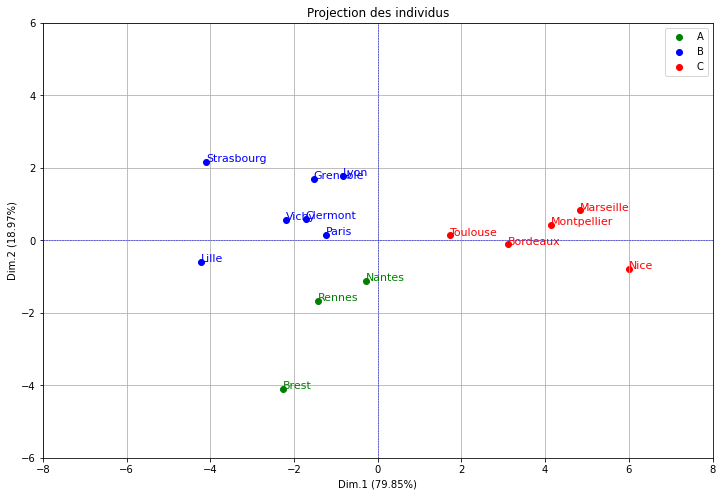

In [60]:
# Fonction de visualisation en 2D
def pca_rowqual_plot(data,vsqual,eigen,axei,axej,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            # set limite
            n = data.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)

            # Graphique
            fig, axes = plt.subplots(figsize = figsize); axes.grid()
            axes.axis([-8,8,-6,6])
            axes.set_title("Projection des individus")
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            cdict = {'A': 'green','B': 'blue', 'C':'red'}
            for group in np.unique(vsqual):
                idx = np.where(vsqual==group)
                axes.scatter(data.iloc[:,axei].values[idx[0]],
                             data.iloc[:,axej].values[idx[0]],
                             label = group, c = cdict[group])
                for i in idx[0]:
                    axes.text(data.iloc[:,0].values[i],data.iloc[:,1].values[i],
                              s=data.index[i],c =cdict[group],fontsize = 11)
            axes.legend()
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    # if false then raise the value error
    except ValueError as e:
            print(e) 

# Nuage des individus sur les axes 1 et 2
pca_rowqual_plot(data=rowcoord,vsqual = vsQual,eigen=eigenvalue,
                 axei=0,axej=1,figsize=(12,8))

In [61]:
# Barycentre des modalités
df = pd.concat([rowcoord,vsQual],axis=1)
# Moyennes conditionnelles
condmean = df.pivot_table(index = 'groupe',values = ['Dim.1','Dim.2'],
                          aggfunc = pd.Series.mean)
display(condmean.T.round(2))

groupe,A,B,C
Dim.1,-1.33,-2.27,3.97
Dim.2,-2.29,0.91,0.10


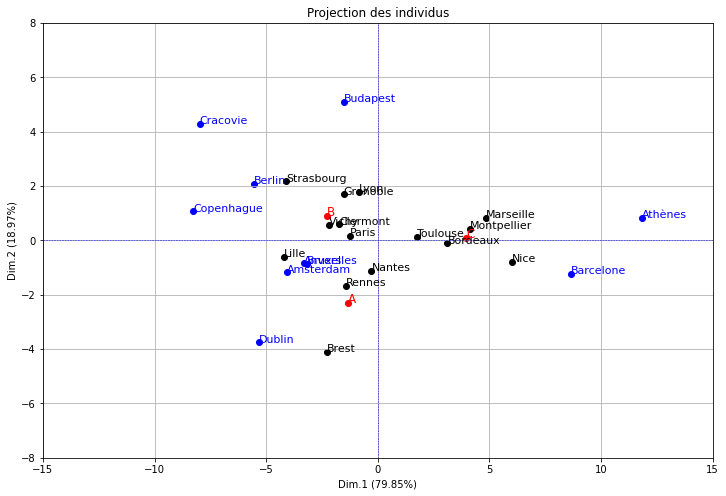

In [62]:
# Fonction de visualisation en 2D
def pca_rowsupqual_plot(data1,data2,data3,eigen,axei,axej,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            n = data1.shape[0];m = data2.shape[0];r = data3.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            

            # Graphique
            fig, axes = plt.subplots(figsize = figsize); axes.grid()
            axes.axis([-15,15,-8,8])
            axes.set_title("Projection des individus")
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            # Positionnement des individus actifs
            for i in range(n):
                plt.scatter(data1.iloc[i,axei], data1.iloc[i,axej],
                            c = "black", alpha = 1)
                axes.text(data1.iloc[i,axei],data1.iloc[i,axej],data1.index[i],
                          color = "black", fontsize = 11)
            # positionnement des individus illustratifs
            for j in range(m):
                plt.scatter(data2.iloc[j,axei], data2.iloc[j,axej],
                            c = "blue", alpha = 1)
                axes.text(data2.iloc[j,axei],data2.iloc[j,axej],data2.index[j],
                          color = "blue", fontsize = 11)
            # positionnement des modalités
            for k in range(r):
                plt.scatter(data3.iloc[k,axei], data3.iloc[k,axej],
                            c = "red", alpha = 1)
                axes.text(data3.iloc[k,axei],data3.iloc[k,axej],data3.index[k],
                          color = "red", fontsize = 12)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    # if false then raise the value error
    except ValueError as e:
            print(e)    

# Nuage des individus
pca_rowsupqual_plot(data1 = rowcoord,
                    data2 = rowsupcoord,
                    data3 = condmean,
                    eigen = eigenvalue,
                    axei = 0,
                    axej = 1,
                    figsize=(12,8))

## Description des classes

#### Description des classes par les variables explicatives quantitatives

$$\text{Corr}(k,F_\alpha)$$

In [63]:
#Description
from scipy.stats import pearsonr

descAxe1 = pd.DataFrame(np.zeros(shape=(p,2),dtype=float),index = donnee.columns,
                        columns = ['correlation','p.value'])

for i in range(p):
    descAxe1.iloc[i,0],descAxe1.iloc[i,1] = pearsonr(donnee.iloc[:,i],
                                                     rowcoord.iloc[:,0])

# Affichage
display(descAxe1.sort_values(by='correlation',ascending=False).round(4))

,correlation,p.value
mois,,
Oct,0.9802,0.0000
Sept,0.9740,0.0000
Avril,0.9693,0.0000
Mars,0.9688,0.0000
Nov,0.9038,0.0000
Août,0.8986,0.0000
Fev,0.8805,0.0000
Mai,0.8728,0.0000
Juin,0.8636,0.0000


In [64]:
display(pd.concat([rowinfos,rowcoord[['Dim.1','Dim.2','Dim.3']],rowcontrib[['Dim.1','Dim.2','Dim.3']],
           rowcos2[['Dim.1','Dim.2','Dim.3']]],axis=1).round(3))

,Disto2,Poids,Inertie,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3
Villes,,,,,,,,,,,,
Bordeaux,10.287,0.067,0.686,3.121,-0.109,-0.721,6.776,0.035,49.476,0.947,0.001,0.051
Brest,21.948,0.067,1.463,-2.268,-4.093,0.115,3.579,49.069,1.257,0.234,0.763,0.001
Clermont,3.386,0.067,0.226,-1.726,0.593,-0.019,2.073,1.028,0.035,0.880,0.104,0.000
Grenoble,5.452,0.067,0.363,-1.529,1.688,-0.137,1.627,8.344,1.800,0.429,0.523,0.003
Lille,18.303,0.067,1.220,-4.217,-0.595,0.356,12.372,1.037,12.060,0.972,0.019,0.007
Lyon,3.913,0.067,0.261,-0.835,1.788,-0.023,0.485,9.365,0.050,0.178,0.817,0.000
Marseille,24.222,0.067,1.615,4.833,0.829,0.357,16.250,2.012,12.107,0.964,0.028,0.005
Montpellier,17.449,0.067,1.163,4.147,0.435,0.183,11.967,0.555,3.198,0.986,0.011,0.002
Nantes,1.402,0.067,0.093,-0.281,-1.115,-0.228,0.055,3.638,4.958,0.056,0.886,0.037


In [65]:
display(pd.concat([varcoord[['Dim.1','Dim.2','Dim.3']],varcontrib[['Dim.1','Dim.2','Dim.3']],
           varcos2[['Dim.1','Dim.2','Dim.3']]],axis=1).round(3))

,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3,Dim.1,Dim.2,Dim.3
mois,,,,,,,,,
Jan,0.761,-0.644,-0.021,6.048,18.238,0.655,0.579,0.415,0.000
Fev,0.880,-0.469,-0.034,8.090,9.666,1.609,0.775,0.220,0.001
Mars,0.969,-0.156,-0.154,9.795,1.069,34.028,0.939,0.024,0.024
Avril,0.969,0.204,-0.122,9.806,1.822,21.169,0.940,0.041,0.015
Mai,0.873,0.475,-0.039,7.950,9.899,2.123,0.762,0.225,0.001
Juin,0.864,0.499,-0.012,7.783,10.953,0.220,0.746,0.249,0.000
Juil,0.842,0.531,0.082,7.391,12.406,9.632,0.708,0.282,0.007
Août,0.899,0.430,0.062,8.427,8.120,5.409,0.807,0.185,0.004
Sept,0.974,0.208,0.041,9.901,1.902,2.430,0.949,0.043,0.002


In [66]:
# Exporter les coordonnées factorielles
#rowcoord.to_pickle("temperature.pkl")  